In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_601 = pd.read_csv("Route601.csv", header=0)

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_38322/3594538633.py:1: DtypeWarning: Columns (9,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df_601 = pd.read_csv("Route601.csv", header=0)


In [3]:
df_601.columns = ['ID','SIGNID','OPD_DATE','WEEKDAY','DIVISIONID','DIVISIONABBR','SERVICEGROUPID','SERVICEGROUPABBR',
              'EXCCOMBOID','EXCCOMBOABBR','BLOCKID_TRP','BLOCK_ID_INT','BLOCK','LINEID_TRP','LINEDIRID_TRP','LINEABBR',
              'LINE_ID_INT','LINECLUSTERABBR','PATTERNID_TRP','PATTERN','PATTERN_ID_INT','DIRNUM','DIRECTION','TRIPNUM_TRP','TRIPID_TRP',
              'TRIPID_INT','TRIP_ID_INT','TRIP_CODE','TRIP_CODE1','TRIP_TYPE','EVENT_NO_TRIP','SCHED_START_TIME','SCHED_END_TIME','SCHED_TRIP_TIME',
              'ACT_START_TIME','ACT_END_TIME','ACT_TRIP_TIME','DIFF_TRIP_TIME','OTP_TRIP_TIME','SCHED_DISTANCE','ACT_DISTANCE','SCHED_SPEED','ACT_SPEED','POINT_COUNT','POINT_FIRST',
              'POINT_LAST','APC','APC_QUALITY','IS_ADDITIONAL','COMPLETENESS','VEHICLE_ID','VEHICLE','SEATS','CAPACITY','CAPACITY_MAX','DRIVER_ID','DRIVER','EVENT_NO_STOP','SEQUENCE',
              'POINT_SEQ','POINT_IDX','POINT_ID','STOPABBR','STOPNAME','STOPTYPE','POINT_ROLE','STOPCLUSTERID','NODE_SEQ','NODEID','NODEABBR','NODE_SEQ_ABBR','ETIME','SCHED_ARR_TIME','ACT_ARR_TIME',
              'SCHED_DEP_TIME','ACT_DEP_TIME','DIFF_DEP_TIME','DWELL_TIME','DOORS_OPENING','METERS','DISTANCE_TO_NEXT','DISTANCE_TO_TRIP','GPS_LATITUDE','GPS_LONGITUDE','BOARDING_ORIG',
              'ALIGHTING_ORIG','LOAD_ORIG','BOARDING_VALID','ALIGHTING_VALID','LOAD_VALID','BOARDING','ALIGHTING','LOAD','LOAD_EXTRA','WHEELCHAIR_COUNT','MISSED_TRIP','OTP_STOP','MISSED_STOP',
              'Source_ID','Pkg_Exec_GUID','CreatedDate','LastModifiedDate','CTE','POINT_IDX_C','DWELLTIME','POINT_F','POINT_L','TERMINAL','LAYOVER']

In [35]:
df_601.head()

,ID,SIGNID,OPD_DATE,WEEKDAY,DIVISIONID,DIVISIONABBR,SERVICEGROUPID,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,...,Pkg_Exec_GUID,CreatedDate,LastModifiedDate,CTE,POINT_IDX_C,DWELLTIME,POINT_F,POINT_L,TERMINAL,LAYOVER
0,5286840160,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
1,5286840161,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
2,5286840162,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
3,5286840163,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
4,5286840164,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_601['SIGNID'].unique()

array(['SIGNID', '138', '143', 143, 131, 132, 138, 130, 136, 142, 133,
       137, 139, 140], dtype=object)

In [6]:
df_601['PATTERN'].unique()

array(['PATTERN', '601001', '601002', '601003', '601004', 601001, 601004,
       601003, 601002, 601005], dtype=object)

In [9]:
sum(df_601['ETIME'].isna())

2980695

In [10]:
sum(df_601['STOPABBR'].isna())

1914968

In [11]:
df = df_601.dropna(subset=['ETIME', 'STOPABBR'])

In [13]:
df.shape

(3552238, 109)

In [14]:
df['SIGNID'].unique()

array(['SIGNID', '138', '143', 143, 131, 132, 138, 130, 136, 142, 133,
       137, 139, 140], dtype=object)

In [17]:
df.head()

,ID,SIGNID,OPD_DATE,WEEKDAY,DIVISIONID,DIVISIONABBR,SERVICEGROUPID,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,...,Pkg_Exec_GUID,CreatedDate,LastModifiedDate,CTE,POINT_IDX_C,DWELLTIME,POINT_F,POINT_L,TERMINAL,LAYOVER
0,ID,SIGNID,OPD_DATE,WEEKDAY,DIVISIONID,DIVISIONABBR,SERVICEGROUPID,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,...,Pkg_Exec_GUID,CreatedDate,LastModifiedDate,CTE,POINT_IDX_C,DWELLTIME,POINT_F,POINT_L,TERMINAL,LAYOVER
1,5286840160,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
2,5286840161,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
3,5286840162,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
4,5286840163,138,2024-01-01,1_MON,1,DIV7,75,5_HOLSAT02,NaN,NaN,...,3BED4F37-24F3-4F8D-883C-CE6BB4FF9216,2024-01-05 07:54:28.967,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_130 = df[df['SIGNID'] == 130]

In [19]:
df_130.shape

(67016, 109)

In [20]:
df_130.to_csv('df_130.csv', index=False)

In [25]:
df_131 = df[df['SIGNID'] == 131]
df_131.to_csv('df_131.csv', index=False)

In [22]:
df_132 = df[df['SIGNID'] == 132]
df_132.to_csv('df_132.csv', index=False)

In [24]:
df_133 = df[df['SIGNID'] == 133]
df_133.to_csv('df_133.csv', index=False)

In [26]:
df_136 = df[df['SIGNID'] == 136]
df_136.to_csv('df_136.csv', index=False)

In [27]:
df_137 = df[df['SIGNID'] == 137]
df_137.to_csv('df_137.csv', index=False)

In [28]:
df_139 = df[df['SIGNID'] == 139]
df_139.to_csv('df_139.csv', index=False)

In [29]:
df_140 = df[df['SIGNID'] == 140]
df_140.to_csv('df_140.csv', index=False)

In [30]:
df_142 = df[df['SIGNID'] == 142]
df_142.to_csv('df_142.csv', index=False)

In [31]:
df_138 = df[df['SIGNID'].isin([138,'138'])]
df_138.to_csv('df_138.csv', index=False)

In [32]:
df_143 = df[df['SIGNID'].isin([143,'143'])]
df_143.to_csv('df_143.csv', index=False)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_time_series_dwell = df_601.groupby('OPD_DATE')['DWELL_TIME'].mean()
decomposition = seasonal_decompose(df_time_series_dwell, model='additive', period=7)

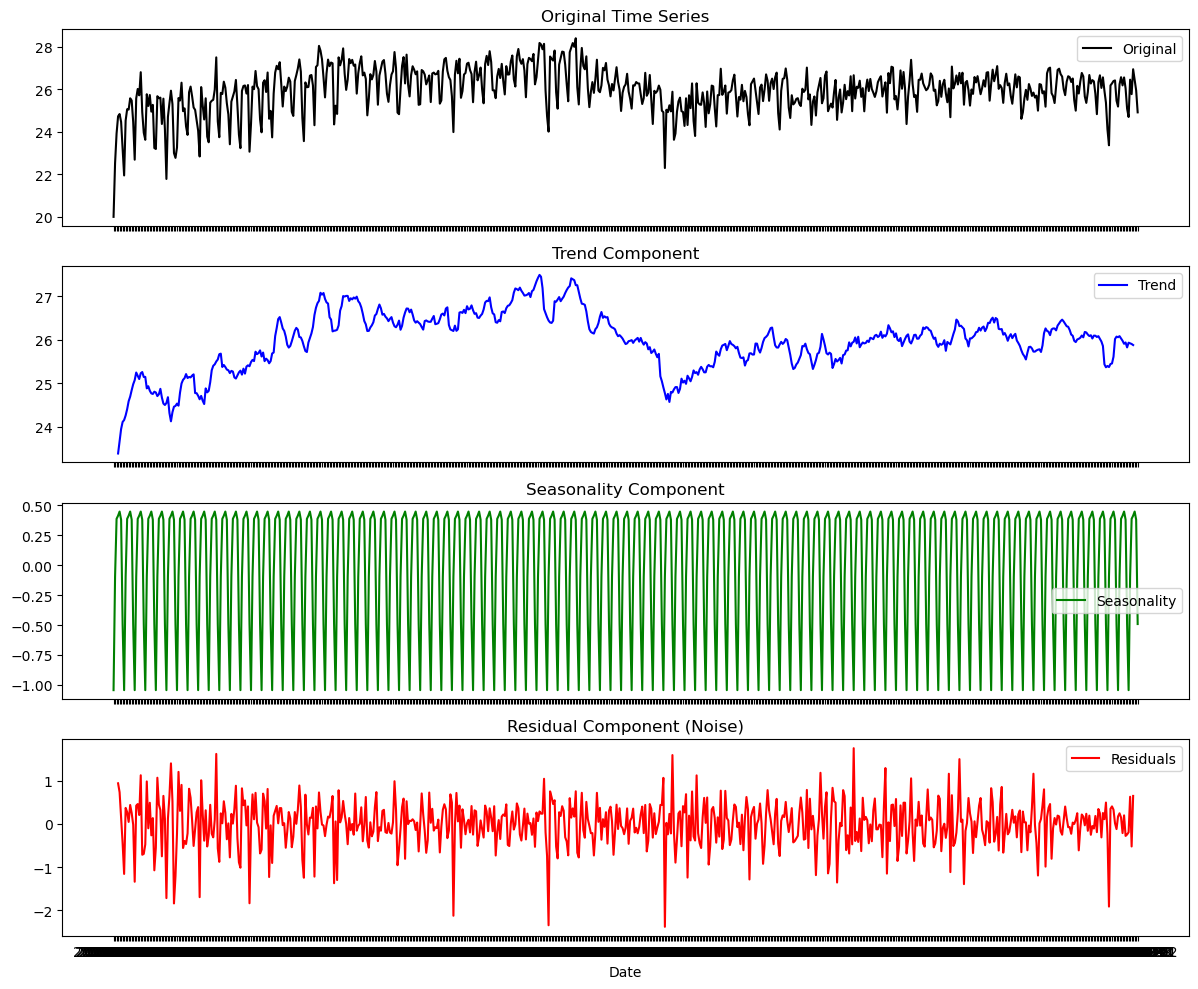

In [40]:
# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Data
axes[0].plot(df_time_series_dwell, label='Original', color='black')
axes[0].set_title('Original Time Series')
axes[0].legend()

# Trend Component
axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend Component')
axes[1].legend()

# Seasonal Component
axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality Component')
axes[2].legend()

# Residual Component (Noise)
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residual Component (Noise)')
axes[3].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [41]:
df_time_series_load = df_601.groupby('OPD_DATE')['LOAD'].mean()
decomposition = seasonal_decompose(df_time_series_load, model='additive', period=7)

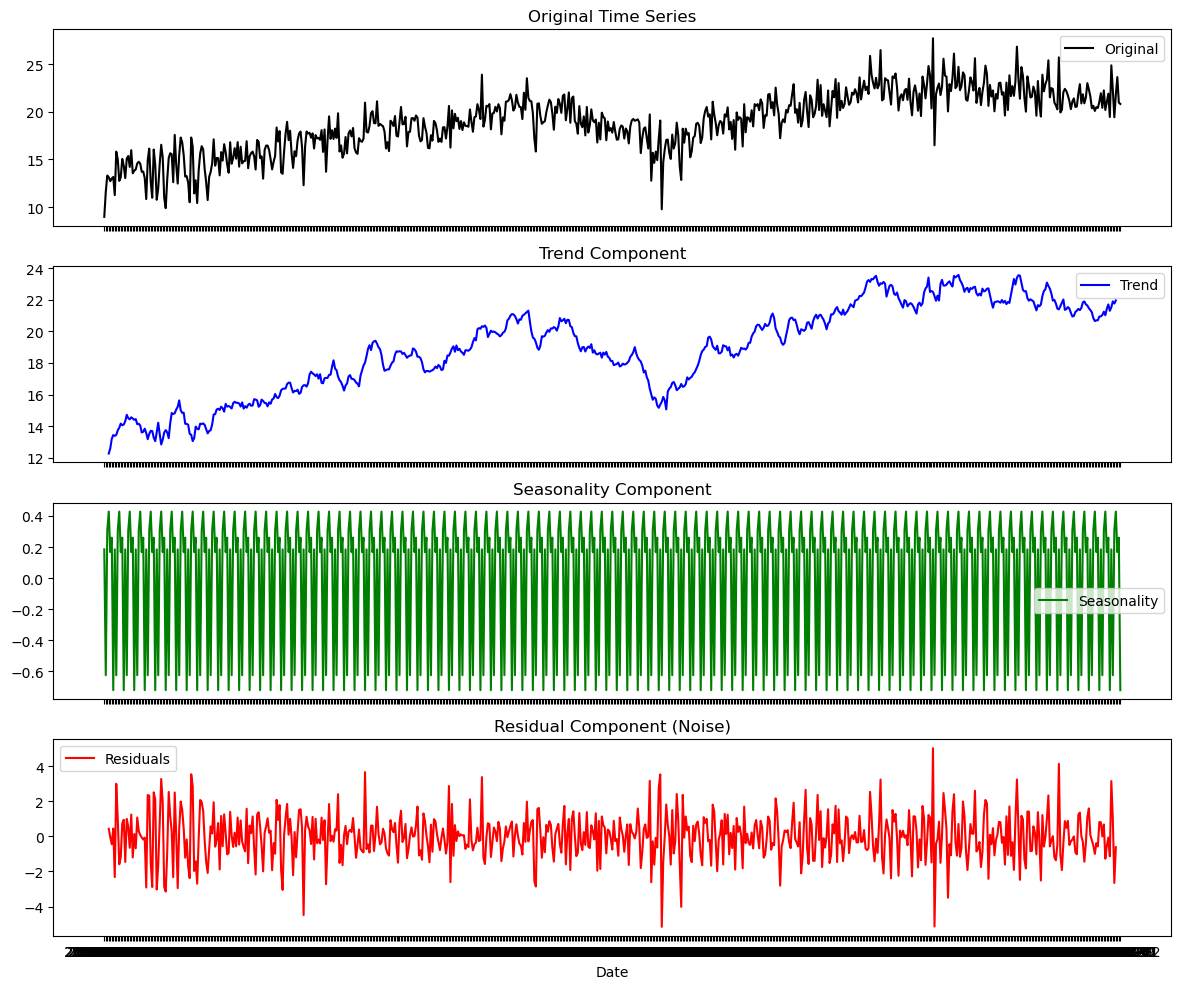

In [42]:
# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Data
axes[0].plot(df_time_series_load, label='Original', color='black')
axes[0].set_title('Original Time Series')
axes[0].legend()

# Trend Component
axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend Component')
axes[1].legend()

# Seasonal Component
axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality Component')
axes[2].legend()

# Residual Component (Noise)
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residual Component (Noise)')
axes[3].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()